Predictive Analytics with
Ensemble Learning

Ensemble Learning (ou aprendizado em conjunto) é uma técnica de inteligência artificial e machine learning que combina vários modelos diferentes (ou iguais) para melhorar o desempenho da previsão.

Em vez de usar um único modelo, usamos vários modelos e combinamos seus resultados.
Isso normalmente gera previsões mais precisas, robustas e confiáveis.



In [ ]:
# Imagine que você quer prever se vai chover amanhã:

# Você consulta 3 previsões meteorológicas diferentes.

# Duas dizem que vai chover, uma diz que não.

# Você decide seguir a maioria → Conclusão: vai chover.

# Isso é um ensemble! Cada previsão é um "modelo" e você combinou as saídas.

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Carregar o dataset
iris = load_iris()
X, y = iris.data, iris.target

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Padronizar os dados (necessário para alguns modelos)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Criar modelos individuais
clf1 = LogisticRegression()
clf2 = KNeighborsClassifier(n_neighbors=5)
clf3 = DecisionTreeClassifier()

# Combinar os modelos com o VotingClassifier
voting_clf = VotingClassifier(estimators=[
    ('lr', clf1),
    ('knn', clf2),
    ('dt', clf3)
], voting='hard')  # "hard" = voto majoritário

# Treinar os modelos
for clf in (clf1, clf2, clf3, voting_clf):
    clf.fit(X_train, y_train)

# Avaliar desempenho
print("Acurácia dos modelos:")
for clf in (clf1, clf2, clf3, voting_clf):
    y_pred = clf.predict(X_test)
    print(f"{clf.__class__.__name__}: {accuracy_score(y_test, y_pred):.2f}")


Acurácia dos modelos:
LogisticRegression: 1.00
KNeighborsClassifier: 1.00
DecisionTreeClassifier: 1.00
VotingClassifier: 1.00


Random Forest

---

Uma Random Forest (ou Floresta Aleatória) é uma técnica de ensemble learning baseada em árvores de decisão (Decision Trees). Vamos por partes:

✅ Passos do funcionamento:
Criação de múltiplas árvores de decisão:

Em vez de treinar um único modelo (como uma única árvore), o algoritmo constrói várias árvores de decisão.

Uso de subconjuntos aleatórios dos dados:

Cada árvore é treinada com um subconjunto aleatório do conjunto de treino (técnica chamada de bagging ou bootstrap aggregating).

Isso gera diversidade entre as árvores, já que cada uma “vê” uma parte diferente dos dados.

Previsão conjunta:

Para classificação: cada árvore “vota” e a classe mais votada é escolhida.

Para regressão: tira-se a média das previsões feitas pelas árvores.

🎯 Objetivo:
A ideia principal é reduzir o risco de overfitting (ajuste exagerado aos dados de treino) que ocorre frequentemente com árvores únicas. Com várias árvores diferentes e independentes, o modelo geral se torna mais robusto e preciso.

🌲 E as Extremely Random Forests?
As Extremely Randomized Trees (ou ExtraTrees) são uma variação da Random Forest, com um toque a mais de aleatoriedade:

Enquanto uma Random Forest busca o melhor ponto de divisão para cada nó (com base, por exemplo, no índice Gini ou entropia), a ExtraTrees escolhe pontos de divisão aleatórios, dentro de um intervalo possível.

Isso faz com que o modelo:

Seja ainda mais rápido para treinar.

Ganhe mais diversidade nas árvores.

Fique menos propenso ao overfitting em alguns casos.

📌 Por que usar Random Forests?
Funciona bem com dados ruidosos.

Gera boas previsões mesmo sem ajuste fino.

Estima importância das variáveis automaticamente.

Fácil de usar e interpretar (em comparação com modelos mais “caixa preta” como redes neurais).



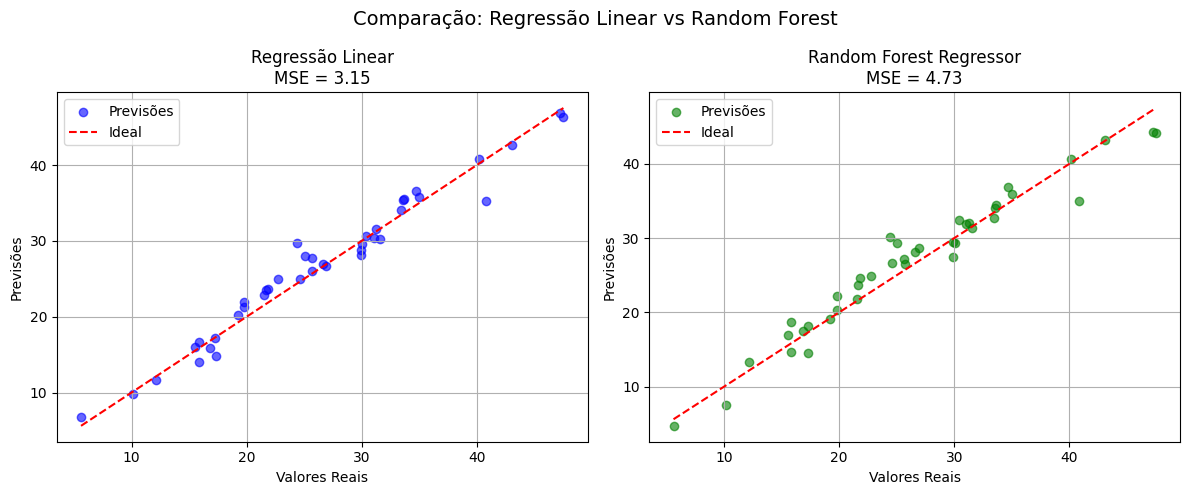

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Gerando dados artificiais multivariados
np.random.seed(0)
X = 10 * np.random.rand(200, 2)  # 2 variáveis independentes
y = 3 * X[:, 0] + 2 * X[:, 1] + np.random.randn(200) * 2  # target com ruído

# Dividindo os dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelos
lr = LinearRegression()
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Treinamento
lr.fit(X_train, y_train)
rf.fit(X_train, y_train)

# Previsões
y_pred_lr = lr.predict(X_test)
y_pred_rf = rf.predict(X_test)

# Erros
mse_lr = mean_squared_error(y_test, y_pred_lr)
mse_rf = mean_squared_error(y_test, y_pred_rf)

# Gráfico de comparação
plt.figure(figsize=(12, 5))

# Regressão Linear
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_lr, color='blue', alpha=0.6, label='Previsões')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', label='Ideal')
plt.title(f'Regressão Linear\nMSE = {mse_lr:.2f}')
plt.xlabel('Valores Reais')
plt.ylabel('Previsões')
plt.legend()
plt.grid(True)

# Random Forest
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_rf, color='green', alpha=0.6, label='Previsões')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', label='Ideal')
plt.title(f'Random Forest Regressor\nMSE = {mse_rf:.2f}')
plt.xlabel('Valores Reais')
plt.ylabel('Previsões')
plt.legend()
plt.grid(True)

plt.suptitle('Comparação: Regressão Linear vs Random Forest', fontsize=14)
plt.tight_layout()
plt.show()


Dealing with class imbalance


---



Lidar com class imbalance (desequilíbrio entre classes) é um desafio comum em tarefas de classificação, quando uma classe está presente em quantidade muito maior do que as outras. Isso pode fazer o modelo aprender a ignorar a classe minoritária, resultando em baixa precisão ou recall para ela.
Exemplo clássico de desequilíbrio:
Fraude bancária: 99,8% das transações são legítimas, 0,2% são fraudes.

Um modelo que sempre prevê "legítima" teria 99,8% de acurácia — mas seria inútil.

Estratégias para lidar com o desequilíbrio
1. Reamostragem
Oversampling (aumentar exemplos da classe minoritária)

Ex: SMOTE — Synthetic Minority Over-sampling Technique.

Undersampling (reduzir exemplos da classe majoritária)

2. Alterar o algoritmo
Usar modelos que lidam melhor com desequilíbrio: RandomForest, XGBoost, CatBoost, etc.

Ajustar o parâmetro class_weight='balanced' (em SVM, LogisticRegression, etc).

3. Alterar a métrica de avaliação
Usar F1-score, Precision-Recall AUC, confusion matrix.

Evitar confiar apenas na accuracy (acurácia).

4. Ajustar o limiar de decisão
Em vez de aceitar o padrão prob > 0.5, pode-se mover o limiar com base na distribuição das classes.



              precision    recall  f1-score   support

           0       0.98      0.87      0.92       268
           1       0.44      0.84      0.57        32

    accuracy                           0.87       300
   macro avg       0.71      0.86      0.75       300
weighted avg       0.92      0.87      0.88       300



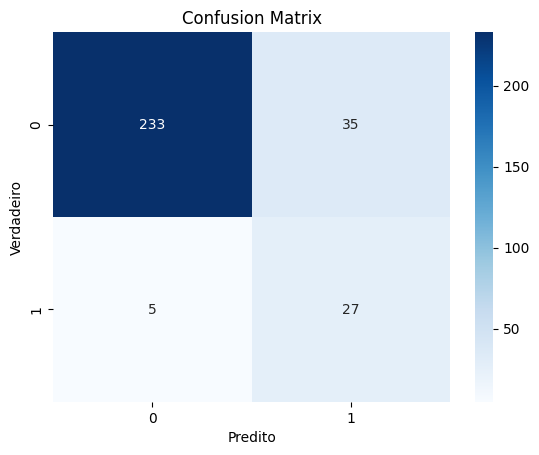

In [6]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

# Corrigido: especificando n_informative e n_redundant
X, y = make_classification(n_classes=2, weights=[0.9, 0.1],
                           n_samples=1000, n_features=2,
                           n_informative=2, n_redundant=0,
                           random_state=42)

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

# Aplicando SMOTE no treino
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

# Treinar modelo
clf = LogisticRegression()
clf.fit(X_res, y_res)

# Avaliar
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

# Matriz de confusão
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predito")
plt.ylabel("Verdadeiro")
plt.show()


O Grid Search é uma técnica essencial para encontrar os melhores hiperparâmetros para um modelo de machine learning. Em vez de adivinhar os valores ideais para parâmetros como C, max_depth, n_estimators, etc., você pode usar o GridSearchCV do scikit-learn, que testa automaticamente todas as combinações fornecidas.

Quando seu modelo tem hiperparâmetros que influenciam o desempenho e você quer encontrar a melhor combinação possível deles com base em uma métrica de avaliação (como acurácia, F1-score, etc).

In [7]:
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report

# Gerando dados
X, y = make_classification(n_samples=1000, n_features=10, weights=[0.8, 0.2],
                           n_classes=2, random_state=42)

# Separar treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                                    test_size=0.3, random_state=42)

# Modelo base
rf = RandomForestClassifier(random_state=42)

# Grade de parâmetros que queremos testar
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'class_weight': [None, 'balanced']
}

# Aplicando Grid Search com validação cruzada
grid_search = GridSearchCV(estimator=rf,
                           param_grid=param_grid,
                           cv=5,              # 5-fold cross-validation
                           scoring='f1',      # usar F1-score como métrica
                           n_jobs=-1,         # usar todos os núcleos disponíveis
                           verbose=1)

# Rodar busca
grid_search.fit(X_train, y_train)

# Mostrar melhor combinação encontrada
print("Melhores parâmetros encontrados:", grid_search.best_params_)

# Avaliação no conjunto de teste
y_pred = grid_search.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Melhores parâmetros encontrados: {'class_weight': None, 'max_depth': None, 'min_samples_split': 5, 'n_estimators': 50}
              precision    recall  f1-score   support

           0       0.93      0.96      0.95       239
           1       0.83      0.72      0.77        61

    accuracy                           0.91       300
   macro avg       0.88      0.84      0.86       300
weighted avg       0.91      0.91      0.91       300



In [8]:
# Importando bibliotecas
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [9]:
# Criando um dataset sintético com 2 classes, onde a classe 0 é 80% dos dados
X, y = make_classification(
    n_samples=1000,         # 1000 amostras
    n_features=10,          # 10 atributos
    n_informative=5,        # 5 atributos informativos
    n_redundant=2,          # 2 atributos redundantes
    n_classes=2,            # 2 classes (0 e 1)
    weights=[0.8, 0.2],     # classe 0 = 80%, classe 1 = 20%
    random_state=42
)


In [10]:
# Separando os dados em treino e teste (70%/30%), preservando proporções das classes
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    stratify=y,            # garante proporções iguais nas classes
    random_state=42
)


In [11]:
# Criando o classificador base
rf = RandomForestClassifier(random_state=42)

# Grade de hiperparâmetros a serem testados
param_grid = {
    'n_estimators': [50, 100],          # número de árvores
    'max_depth': [None, 5],             # profundidade máxima
    'min_samples_split': [2, 5],        # mínimo de amostras para split
    'class_weight': [None, 'balanced']  # ponderação de classes
}


In [12]:
# Criando o objeto GridSearchCV
grid_search = GridSearchCV(
    estimator=rf,             # modelo base
    param_grid=param_grid,    # combinações de parâmetros
    cv=5,                     # validação cruzada com 5 grupos
    scoring='f1',             # métrica de avaliação
    n_jobs=-1,                # usar todos os núcleos
    verbose=1                 # mostrar progresso
)

# Treinando o modelo em cima do conjunto de treino
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'class_weight': [None, 'balanced'],
                         'max_depth': [None, 5], 'min_samples_split': [2, 5],
                         'n_estimators': [50, 100]},
             scoring='f1', verbose=1)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Melhores parâmetros encontrados:
{'rf__class_weight': None, 'rf__max_depth': None, 'rf__min_samples_split': 5, 'rf__n_estimators': 100}

Relatório de Classificação com SMOTE:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       239
           1       0.84      0.84      0.84        61

    accuracy                           0.93       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.93      0.93      0.93       300



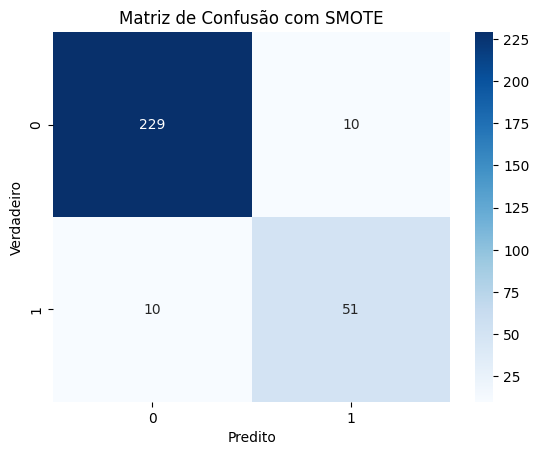

In [15]:
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. Criando dados desbalanceados
X, y = make_classification(n_samples=1000, n_features=10,
                           n_informative=5, n_redundant=2,
                           weights=[0.8, 0.2], n_classes=2,
                           random_state=42)

# 2. Dividindo treino/teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    stratify=y, random_state=42)

# 3. Pipeline com SMOTE + RandomForest
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('rf', RandomForestClassifier(random_state=42))
])

# 4. Grade de parâmetros (atenção: prefixo "rf__" pois está dentro do pipeline)
param_grid = {
    'rf__n_estimators': [50, 100],
    'rf__max_depth': [None, 5],
    'rf__min_samples_split': [2, 5],
    'rf__class_weight': [None, 'balanced']
}

# 5. Aplicando GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, scoring='f1', cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# 6. Avaliação
y_pred = grid_search.best_estimator_.predict(X_test)
print("Melhores parâmetros encontrados:")
print(grid_search.best_params_)

print("\nRelatório de Classificação com SMOTE:")
print(classification_report(y_test, y_pred))

# 7. Matriz de confusão
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusão com SMOTE")
plt.xlabel("Predito")
plt.ylabel("Verdadeiro")
plt.show()
